In [1]:
import pandas as pd
import numpy as np
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])
            
df =pd.read_csv("preds.csv")

In [2]:
df = df.rename(columns={"Unnamed: 0": "user_id_id", "0": "prediction"})

In [3]:
df["prediction"].head()

0    [[ 0.01311813  0.98688187]]
1                    [[ 0.  1.]]
2                    [[ 0.  1.]]
3                    [[ 0.  1.]]
4                  [[ 0.9  0.1]]
Name: prediction, dtype: object

In [4]:
np.fromstring('1 2', dtype=int, sep=' ')
np.fromstring('[0.01311813  0.98688187]', dtype=float, sep=' ')

array([], dtype=float64)

In [5]:
df["prediction"] = df["prediction"].apply(lambda x : np.fromstring(x[2:-2], dtype=float, sep=' ')[-1])

In [6]:
a = df["prediction"].values

In [7]:
df["user_id_id"].max()

17287

In [8]:
other_sub = pd.read_csv("rand_all_data_m2.csv.gz")

In [9]:
b = other_sub.ix[17288:]["is_listened"].values

In [10]:
v = np.hstack((a, b))

In [11]:
len(v)

19918

In [4]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [13]:
build_kaggle_submission(v, "invividual")

In [14]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_test.csv.gz")["is_listened"].values
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values

In [15]:
d = 0.35 * a + 0.35 * b + 0.3* c

In [16]:
build_kaggle_submission(d, "merge2")

In [17]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_test.csv.gz")["is_listened"].values
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values

d = 0.4 * a + 0.4 * b + 0.2* c

build_kaggle_submission(d, "merge3")

In [18]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_test.csv.gz")["is_listened"].values
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values

d = 0.25 * a + 0.25 * b + 0.5* c

build_kaggle_submission(d, "merge4")

In [19]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_test.csv.gz")["is_listened"].values
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values

d = 0.35 * a + 0.3 * b + 0.35* c

build_kaggle_submission(d, "merge5")

In [20]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_test.csv.gz")["is_listened"].values
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values

d = 0.4 * a + 0.3 * b + 0.3* c

build_kaggle_submission(d, "merge6")

In [21]:
single_model_pred = pd.read_csv("single_model_pred_log.csv")
single_model_auc = pd.read_csv("single_model_auc_log.csv")
rocs = single_model_auc.to_dict()

In [22]:
### merge7 > 0.74
### merge 8 > 0.78
best = {k:a for k,a in rocs["0"].items() if a > 0.78}
len(best)

709

In [23]:
d[0]

0.95999999999999996

In [24]:
for k, v in best.items():
    d[k] = d[k]*0.7 + best[k] * 0.3

In [25]:
build_kaggle_submission(d, "merge8")

In [26]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_test.csv.gz")["is_listened"].values
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values

d = 0.4 * a + 0.3 * b + 0.3* c

single_model_pred = pd.read_csv("single_model_pred_rand.csv")
single_model_auc = pd.read_csv("single_model_auc_rand.csv")
rocs = single_model_auc.to_dict()

best = {k:a for k,a in rocs["0"].items() if a > 0.74}
print(len(best))

for k, v in best.items():
    d[k] = d[k]*0.6 + best[k] * 0.4
    
build_kaggle_submission(d, "merge9")

1967


In [27]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_test.csv.gz")["is_listened"].values
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values

d = 0.4 * a + 0.3 * b + 0.3* c

single_model_pred = pd.read_csv("single_model_pred_rand.csv")
single_model_auc = pd.read_csv("single_model_auc_rand.csv")
rocs = single_model_auc.to_dict()

best = {k:a for k,a in rocs["0"].items() if a > 0.84}
print(len(best))

for k, v in best.items():
    d[k] = d[k]*0.8 + best[k] * 0.2
    
build_kaggle_submission(d, "merge10")

521


### Melhorando users com poucos registros

In [35]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_test.csv.gz")["is_listened"].values
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values

d = 0.4 * a + 0.3 * b + 0.3* c

threshold = 15
register_count = pd.read_csv("register_count.csv")
users_few_registers = register_count[(register_count["user_id"] <= threshold)].index

best = {k:a for k,a in rocs["0"].items() if a > 0.84}
print(len(users_few_registers))

for k in users_few_registers:
    d[k] = d[k]*0.5 + 0.54207543056463925 * 0.5
    
build_kaggle_submission(d, "merge11")

1489


In [5]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_2_models_threshold_1.csv.gz")["is_listened"].values
#b = pd.read_csv("rand_test.csv.gz")["is_listened"].values
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values

d = 0.4 * a + 0.3 * b + 0.3* c

build_kaggle_submission(d, "merge16")

In [22]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_2_models_threshold_1.csv.gz")["is_listened"].values
#b = pd.read_csv("rand_test.csv.gz")["is_listened"].values 
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values
d = pd.read_csv("rand_2_models_threshold_5.csv.gz")["is_listened"].values

e = 0.25 * a + 0.3 * b + 0.25* c + 0.2*d

build_kaggle_submission(e, "merge17")

In [24]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_2_models_threshold_1.csv.gz")["is_listened"].values
#b = pd.read_csv("rand_test.csv.gz")["is_listened"].values 
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values
d = pd.read_csv("rand_2_models_threshold_5.csv.gz")["is_listened"].values

e = 0.25 * a + 0.3 * b + 0.25* c + 0.2*d


new_model_pred = pd.read_csv("only_flow_above_30regs.csv").drop("Unnamed: 0", axis=1)
new_preds = new_model_pred.to_dict()
users = new_model_pred["user_id_id"].unique()

for user in users:
    #e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
    e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
build_kaggle_submission(e, "merge18")

In [4]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_2_models_threshold_1.csv.gz")["is_listened"].values
#b = pd.read_csv("rand_test.csv.gz")["is_listened"].values 
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values
d = pd.read_csv("rand_2_models_threshold_5.csv.gz")["is_listened"].values
f = pd.read_csv("note18_2.csv.gz")["is_listened"].values

e = 0.2 * a + 0.2 * b + 0.2* c + 0.2*d *0.2*f


# new_model_pred = pd.read_csv("only_flow_above_30regs.csv").drop("Unnamed: 0", axis=1)
# new_preds = new_model_pred.to_dict()
# users = new_model_pred["user_id_id"].unique()

# for user in users:
#     #e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
#     e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
build_kaggle_submission(e, "merge19")

In [6]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_2_models_threshold_1.csv.gz")["is_listened"].values
#b = pd.read_csv("rand_test.csv.gz")["is_listened"].values 
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values
d = pd.read_csv("rand_2_models_threshold_5.csv.gz")["is_listened"].values
f = pd.read_csv("note18_2.csv.gz")["is_listened"].values

e = 0.25 * a + 0.25 * b + 0.2* c + 0.2*d *0.1*f


# new_model_pred = pd.read_csv("only_flow_above_30regs.csv").drop("Unnamed: 0", axis=1)
# new_preds = new_model_pred.to_dict()
# users = new_model_pred["user_id_id"].unique()

# for user in users:
#     #e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
#     e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
build_kaggle_submission(e, "merge20")

In [7]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_2_models_threshold_1.csv.gz")["is_listened"].values
#b = pd.read_csv("rand_test.csv.gz")["is_listened"].values 
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values
d = pd.read_csv("rand_2_models_threshold_5.csv.gz")["is_listened"].values
f = pd.read_csv("note18_2.csv.gz")["is_listened"].values


#e = 0.25 * a + 0.3 * b + 0.25* c + 0.2*d
e = 0.2 * a + 0.25 * b + 0.2* c + 0.2*d *0.15*f


# new_model_pred = pd.read_csv("only_flow_above_30regs.csv").drop("Unnamed: 0", axis=1)
# new_preds = new_model_pred.to_dict()
# users = new_model_pred["user_id_id"].unique()

# for user in users:
#     #e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
#     e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
build_kaggle_submission(e, "merge21")

### Verify Correlation

In [2]:
submissions_to_consider = ["note18_2.csv.gz",
                           "rand_all_data_m2.csv.gz",
                           "rand_2_models_threshold_1.csv.gz",
                           "rand_2_models_threshold_5.csv.gz",
                           "rand_2_models_threshold_30.csv.gz",
                           "note12_4.csv.gz",
                           "note12_3.csv.gz",
                           "note12_1.csv.gz",
                          "xgb_all_data_m2.csv.gz",
                          "rand_2m_data4_2.csv.gz",
                          "note19_1.csv.gz"]

corr_df = pd.DataFrame()

for submission in submissions_to_consider:
    df = pd.read_csv(submission)
    corr_df[submission.split(".")[0]] = df["is_listened"]

/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


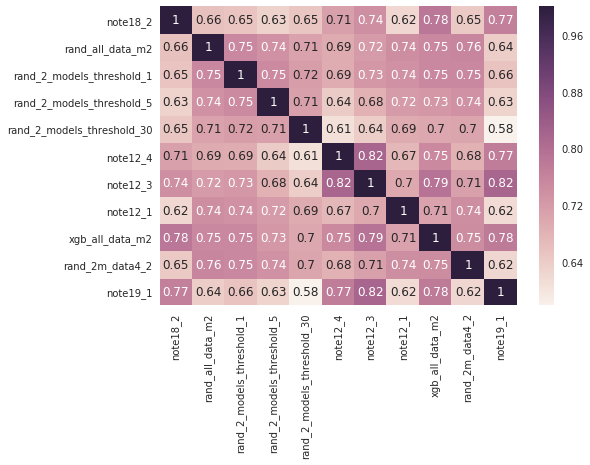

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_df.corr(), annot=True)
plt.show()

In [4]:
corr_df.corr()

,note18_2,rand_all_data_m2,rand_2_models_threshold_1,rand_2_models_threshold_5,rand_2_models_threshold_30,note12_4,note12_3,note12_1,xgb_all_data_m2,rand_2m_data4_2,note19_1
note18_2,1.000000,0.658492,0.653898,0.630431,0.651401,0.712131,0.741057,0.622408,0.784445,0.645233,0.767377
rand_all_data_m2,0.658492,1.000000,0.752202,0.736299,0.709166,0.693533,0.721719,0.742443,0.752243,0.757856,0.640064
rand_2_models_threshold_1,0.653898,0.752202,1.000000,0.750017,0.716000,0.691530,0.726106,0.738695,0.754850,0.752497,0.656625
rand_2_models_threshold_5,0.630431,0.736299,0.750017,1.000000,0.712677,0.642985,0.683142,0.720874,0.726190,0.735622,0.628150
rand_2_models_threshold_30,0.651401,0.709166,0.716000,0.712677,1.000000,0.608592,0.638821,0.693789,0.699780,0.704239,0.579487
note12_4,0.712131,0.693533,0.691530,0.642985,0.608592,1.000000,0.817699,0.673978,0.750483,0.683272,0.773954
note12_3,0.741057,0.721719,0.726106,0.683142,0.638821,0.817699,1.000000,0.698089,0.791821,0.712405,0.818012
note12_1,0.622408,0.742443,0.738695,0.720874,0.693789,0.673978,0.698089,1.000000,0.708483,0.742682,0.616245
xgb_all_data_m2,0.784445,0.752243,0.754850,0.726190,0.699780,0.750483,0.791821,0.708483,1.000000,0.746416,0.777574
rand_2m_data4_2,0.645233,0.757856,0.752497,0.735622,0.704239,0.683272,0.712405,0.742682,0.746416,1.000000,0.624082


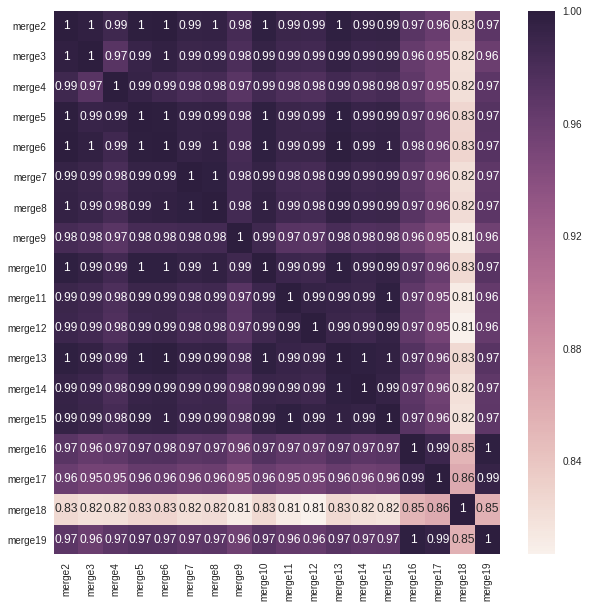

In [19]:
submissions_to_consider = ["note18_2.csv.gz",
                           "rand_all_data_m2.csv.gz",
                           "rand_2_models_threshold_1.csv.gz",
                           "rand_2_models_threshold_5.csv.gz",
                           "note12_4.csv.gz"]

submissions_to_consider = ["merge" + str(i) + ".csv.gz" for i in range(2, 20)]
corr_df = pd.DataFrame()

for submission in submissions_to_consider:
    df = pd.read_csv(submission)
    corr_df[submission.split(".")[0]] = df["is_listened"]
    
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df.corr(), annot=True)
plt.show()

In [27]:
a = pd.read_csv("merge17.csv.gz")["is_listened"].values
b = pd.read_csv("merge18.csv.gz")["is_listened"].values

c = 0.7*a + 0.3*b

# new_model_pred = pd.read_csv("only_flow_above_30regs.csv").drop("Unnamed: 0", axis=1)
# new_preds = new_model_pred.to_dict()
# users = new_model_pred["user_id_id"].unique()

# for user in users:
#     #e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
#     e[int(user)] = (e[int(user)] * 0.5) + (new_model_pred[new_model_pred["user_id_id"] == user]["prediction"].values[0]*0.5)
build_kaggle_submission(c, "merge22")

In [28]:
a = pd.read_csv("rand_all_data_m2.csv.gz")["is_listened"].values
b = pd.read_csv("rand_2_models_threshold_1.csv.gz")["is_listened"].values
#b = pd.read_csv("rand_test.csv.gz")["is_listened"].values 
c = pd.read_csv("note12_4.csv.gz")["is_listened"].values
c2 = pd.read_csv("note12_3.csv.gz")["is_listened"].values
d = pd.read_csv("rand_2_models_threshold_30.csv.gz")["is_listened"].values

e = 0.25 * a + 0.3 * b + 0.2* c + 0.05*c2 + 0.2*d

build_kaggle_submission(e, "merge23")